# Project 2021

####          MSc in Data Analytics 2021 
####          National College of Ireland 
####          Dublin, Ireland 
####          Module: Database and Analytics Programming (H9DAP)
####         Lecturer: Athanasios Staikopoulos

# Load Libraries

In [ ]:
#Allows to reload custom module modifications
%load_ext autoreload
%autoreload 2

# Import libraries

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
#Imports custom functions from 'mypackage'
from  mypackage import functions  # Custom  misc functions
from  mypackage import mongo      # Custom functions for MongoDB
from  mypackage import postgresql # Custom functions for PostgreSQL

# Upload DataSet to mongodb


In [ ]:
# Print the Selected DB and Collection status
dbname = 'Dataset01' #Name of the database to store the data
collname = 'mex_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

In [ ]:
# Print the Selected DB and Collection status
dbname = 'Dataset02' #Name of the database to store the data
collname = 'us_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

In [ ]:
# Print the Selected DB and Collection status
dbname = 'Dataset03' #Name of the database to store the data
collname = 'world_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

#  Create Dataframe

In [ ]:
mex_mort = postgresql.getTableToDataframe('mex_mort')

In [ ]:
us_mort = postgresql.getTableToDataframe('us_mort')

In [ ]:
world_mort = postgresql.getTableToDataframe('world_mort')

In [ ]:
mex_mort.head()


In [ ]:
us_mort.head()

In [ ]:
world_mort.head()

In [ ]:

count_mex = mex_mort.icd10_chapter.value_counts()

In [ ]:
count_us=us_mort.icd10_chapter.value_counts()

In [ ]:
count_world=world_mort.icd10_chapter.value_counts()

In [ ]:
count_df= pd.concat([count_mex,count_us,count_world],axis=1)

In [ ]:
count_df

In [ ]:
count_df.columns = ['mex','us','world']

In [ ]:
#Total Count of death 
count_df

In [ ]:
# Import Plotting libraries
import matplotlib.pyplot  as plt
import matplotlib.style as style 
import seaborn as sns

# Visulaization

<AxesSubplot:>

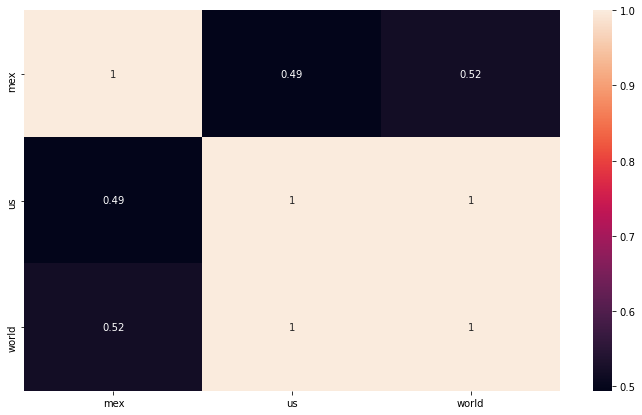

In [29]:
fig, ax = plt.subplots(figsize = (12, 7))
  
count_df = pd.DataFrame(count_df, columns =['mex', 'us', 'world'])
  
corr = count_df.corr()
sns.heatmap(corr, annot = True)

In [30]:
plotdata = pd.DataFrame(count_df)
plotdata

mex      us  world
I00–I99  2798  1897.0   1854
E00–E90  1689    73.0     50
C00–D48  1316    29.0     33
V01–Y98  1151    96.0     89
J00–J99   980   568.0    583
K00–K93   929   273.0    252
N00–N99   376   163.0    158
A00–B99   294    88.0    112
P00–P96   183    16.0     11
G00–G99   179   255.0    210
R00–R99   172    68.0     68
Q00–Q99   113    15.0     16
M00–M99    90    42.0     33
L00–L99    70     8.0     10
F00–F99    69   311.0    278
D50–D89    43  1338.0   1265
O00–O99    13     4.0      1
H00–H59     2   537.0    490
H60–H95     2     NaN      1

In [31]:
plotdata2 = plotdata.div(plotdata.sum(axis=1), axis=0)*100
plotdata2

mex         us      world
I00–I99  42.724080  28.966254  28.309666
E00–E90  93.211921   4.028698   2.759382
C00–D48  95.500726   2.104499   2.394775
V01–Y98  86.152695   7.185629   6.661677
J00–J99  45.987799  26.654153  27.358048
K00–K93  63.892710  18.775791  17.331499
N00–N99  53.945481  23.385940  22.668580
A00–B99  59.514170  17.813765  22.672065
P00–P96  87.142857   7.619048   5.238095
G00–G99  27.795031  39.596273  32.608696
R00–R99  55.844156  22.077922  22.077922
Q00–Q99  78.472222  10.416667  11.111111
M00–M99  54.545455  25.454545  20.000000
L00–L99  79.545455   9.090909  11.363636
F00–F99  10.486322  47.264438  42.249240
D50–D89   1.625094  50.566893  47.808012
O00–O99  72.222222  22.222222   5.555556
H00–H59   0.194363  52.186589  47.619048
H60–H95  66.666667        NaN  33.333333

<AxesSubplot:>

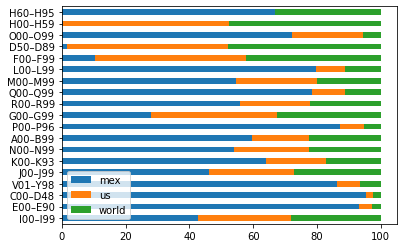

In [32]:
plotdata2.plot(kind="barh", stacked=True)

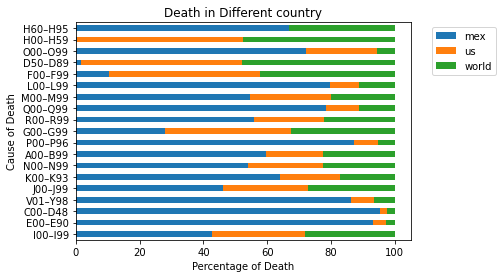

In [28]:
plotdata2.plot(kind="barh", stacked=True)
plt.legend( bbox_to_anchor=(1.05, 1))
plt.title('Death in Different country')
plt.ylabel('Cause of Death')
plt.xlabel('Percentage of Death')
plt.show()

In [ ]:
SELECT icd10_chapter, sum(icd10_chapter)
FROM mex_mort
GROUP BY
      icd10_chapter,
      age_group;

In [ ]:
ex=sns.load_dataset('ds')
ex=ex.pivot('month','type_of_death')
display=sns.heatmap(e)


In [ ]:
#sns.set_theme('bmh')
#plt.style.use('plot-style-name-goes-here')
sns.set()
sns.set_context('poster',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
#sns.set_context("notebook")
colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
f_folors = ["#E76F51","#F4A261","#E9C46A","#2A9D8F","#264653"]

bin_colors = ["#264653","#2A9D8F"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
f_palette = sns.color_palette(f_folors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

In [ ]:
world_mort[world_mort.CountryCode == 'US']